In [1]:
## line magic that instructs Jupyter to capture Matplotlib plots and render them in the cell output
%matplotlib inline
## Import libraries and tools necessary for data analysis and plotting
## NumPy package for scientific computing in Python is included in pandas
## pandas is an open source data analysis and manipulation tool
import pandas as pd
## matplotlib is a comprehensive library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
## seaborn is a data visualization library based on matplotlib that provides a high level interface for drawing visually attractive and informative statistical graphs
import seaborn as sns


## Sets background of plots to gray with grid lines
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.columns = ['Longitude', 'Latitude', 'Housing Median Age', 'Total Rooms', 'Total Bedrooms', 'Population', 'Households', 'Median Income', 'Median House Value', 'Proximity to Ocean']

In [4]:
# Will drop all rows where the colum 'Total Bedrooms' is empty
df = df.dropna(subset=['Total Bedrooms'])

In [5]:
## Results indicate that rows have been removed.
df.describe()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
## Checks each column for null values, and returns how many total cells are empty per column. As 'Total Bedrooms' is not currently showing
## any empty cells, this indicates our drop method above has worked.
df.isnull().sum()

Longitude             0
Latitude              0
Housing Median Age    0
Total Rooms           0
Total Bedrooms        0
Population            0
Households            0
Median Income         0
Median House Value    0
Proximity to Ocean    0
dtype: int64

In [7]:
## Step 2: Feature Engineering - Create or transform features if necessary (e.g. transform categorical data into numerical form using
## one-hot encoding.
## As identified earlier, the 'Proximity to Ocean' category is not numerical, but categorical; and so must be transformed
## Reference: https://www.geeksforgeeks.org/ml-one-hot-encoding/

In [8]:
## There are two options for one-hot encoding in python. Via .get_dummies() function from pandas, or via sklearn OneHotEncoder function.
## The former is simpler to set up if you have already identified the categorical columns. The second is an all-in-one identification and
## one-hot encoding function, but requires significantly more setup to implement. Both output the same result. Given this and that we have 
## already identified our categorical features in the sections above, we've elected to use the former function.
## Reference: https://www.geeksforgeeks.org/ml-one-hot-encoding/ & https://stackoverflow.com/questions/77643432/why-is-pd-get-dummies-returning-boolean-values-instead-of-the-binaries-of-0-1
one_hot_encoded_df = pd.get_dummies(df, columns = ['Proximity to Ocean'], dtype=int)

In [9]:
one_hot_encoded_df.head()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Proximity to Ocean_<1H OCEAN,Proximity to Ocean_INLAND,Proximity to Ocean_ISLAND,Proximity to Ocean_NEAR BAY,Proximity to Ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [10]:
one_hot_encoded_df.tail()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Proximity to Ocean_<1H OCEAN,Proximity to Ocean_INLAND,Proximity to Ocean_ISLAND,Proximity to Ocean_NEAR BAY,Proximity to Ocean_NEAR OCEAN
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,0,1,0,0,0


In [11]:
## NOTE: One thing to consider for categorical attribute - does there exist collinearity between it and longitude/latitude? If so, is it necessary
## to include 'Proximity To Ocean' category at all? Consider when testing model assumptions in phase 2

In [12]:
# Step 3: Outlier Detection and Removal - Identify and handle outliers that could skew the results.
## Outliers for all categories were originally identified for each column (except 'Proximity to Ocean' which is unnecessary as the 
## new one-hot encoded columns are of a Bernouilli distribution) during the Exploratory Data Analysis. We have decided to run the outlier detection
## function during this phase after the removal of the 'Total Bedrooms' null values, so results are as accurate as possible.
## The question then becomes, what to do with the outliers? There are three options: drop them, cap them, or replace them with imputation
## Reference: https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Finding%20outliers%20using%20statistical%20methods,-Since%20the%20data&text=Using%20the%20IQR%2C%20the%20outlier,Q1%20(Q3%E2%80%93Q1).

In [13]:
## See Drop Outliers Notebook for identification of outliers per column and discussion.

In [14]:
## Reference: https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/#
## Remove dubious population data point correlating to Camp Pendleton
outlierPop = one_hot_encoded_df[ (one_hot_encoded_df['Population'] > 30000)].index
one_hot_encoded_df.drop(outlierPop, inplace=True)


In [15]:
one_hot_encoded_df.describe()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Proximity to Ocean_<1H OCEAN,Proximity to Ocean_INLAND,Proximity to Ocean_ISLAND,Proximity to Ocean_NEAR BAY,Proximity to Ocean_NEAR OCEAN
count,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000
mean,-119.570794,35.633333,28.633810,2635.403093,537.661022,1423.270311,499.224501,3.871225,206867.959769,0.442101,0.317933,0.000245,0.111100,0.128622
std,2.003570,2.136340,12.591697,2179.646850,420.329576,1107.601941,381.139837,1.899316,115437.378801,0.496649,0.465685,0.015642,0.314264,0.334789
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563400,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2126.500000,435.000000,1166.000000,409.000000,3.536650,179750.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
## Reference: Google AI,Prompt"cap outliers in certain columns in python dataframe"
## Capping == winsorizing

def cap_outliers(df, columns, threshold=1.5):

    df_capped = df.copy()

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + threshold * iqr
        lower_limit = q1 - threshold * iqr

        df_capped[col] = df[col].clip(lower_limit, upper_limit)

    return df_capped

In [17]:
capped_df = cap_outliers(one_hot_encoded_df, ['Total Rooms', 'Total Bedrooms', 'Population', 'Households', 'Median Income', 'Median House Value'])

In [18]:
capped_df.describe()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Proximity to Ocean_<1H OCEAN,Proximity to Ocean_INLAND,Proximity to Ocean_ISLAND,Proximity to Ocean_NEAR BAY,Proximity to Ocean_NEAR OCEAN
count,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000,20432.000000
mean,-119.570794,35.633333,28.633810,2440.306896,502.505237,1335.806700,468.712020,3.801735,205995.046789,0.442101,0.317933,0.000245,0.111100,0.128622
std,2.003570,2.136340,12.591697,1394.468921,287.053911,763.880441,264.952514,1.657713,113263.893609,0.496649,0.465685,0.015642,0.314264,0.334789
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563400,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2126.500000,435.000000,1166.000000,409.000000,3.536650,179750.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,5682.500000,1173.500000,3124.500000,1090.000000,8.014900,482500.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Total Rooms'}>]], dtype=object)

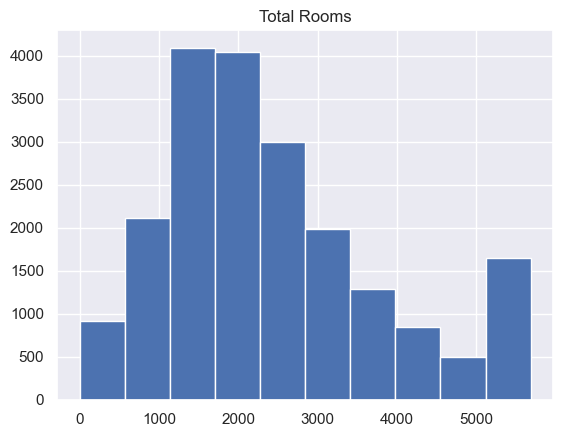

In [19]:
capped_df.hist(column='Total Rooms')

array([[<Axes: title={'center': 'Total Bedrooms'}>]], dtype=object)

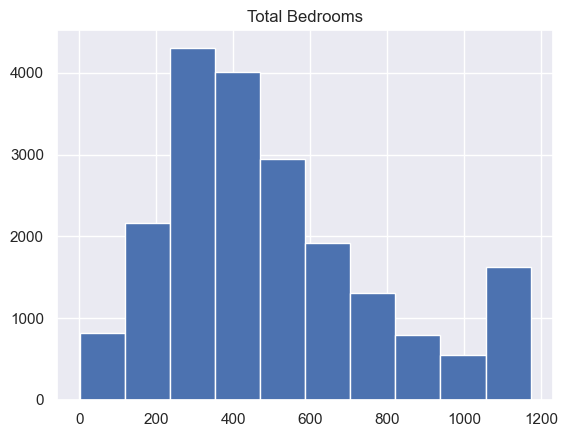

In [20]:
capped_df.hist(column='Total Bedrooms')

array([[<Axes: title={'center': 'Population'}>]], dtype=object)

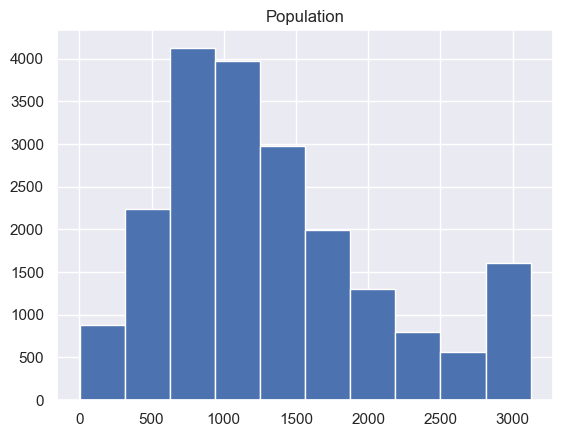

In [21]:
capped_df.hist(column='Population')

array([[<Axes: title={'center': 'Households'}>]], dtype=object)

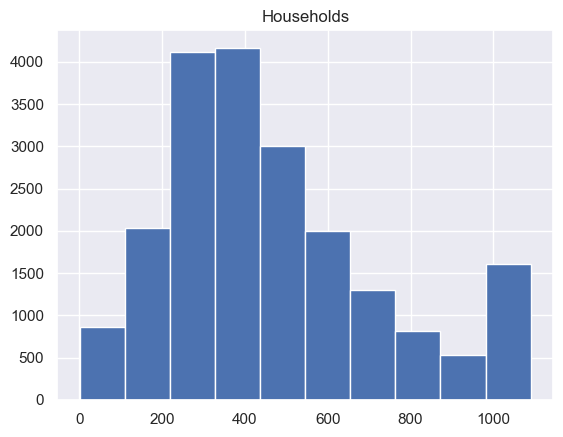

In [22]:
capped_df.hist(column='Households')

array([[<Axes: title={'center': 'Median Income'}>]], dtype=object)

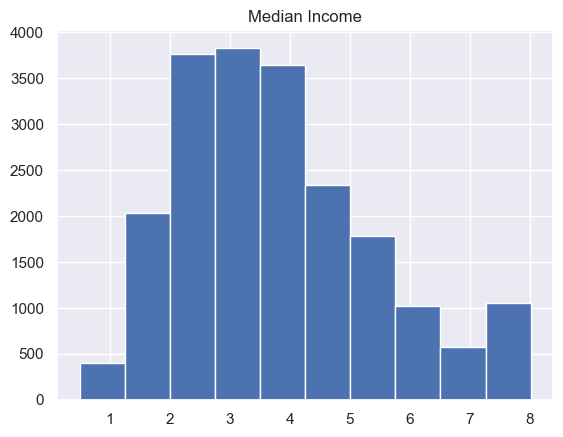

In [23]:
capped_df.hist(column='Median Income')

array([[<Axes: title={'center': 'Median House Value'}>]], dtype=object)

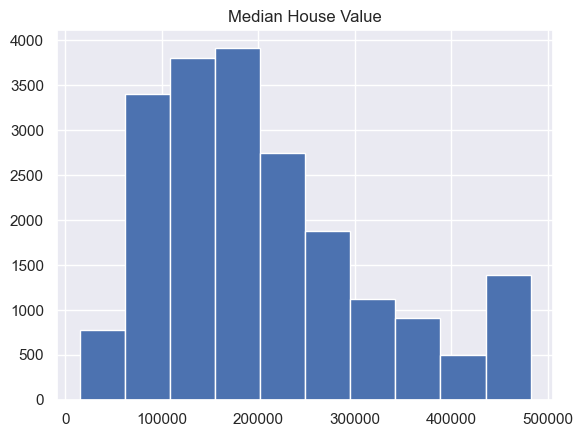

In [24]:
capped_df.hist(column='Median House Value')

In [25]:
## Step #4: Scaling Features: Normalize or standardize the features to ensure that they are on a similar scale.

## Normalization on all data sets:

In [26]:
## References: https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn and
## https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
from sklearn.preprocessing import Normalizer
 
scaler = Normalizer()
scaled_df = capped_df.copy()
scaled_df[['Latitude', 'Longitude', 'Housing Median Age', 'Total Rooms', 'Total Bedrooms', 'Population', 'Households', 'Median Income', 'Median House Value']] = scaler.fit_transform(scaled_df[['Latitude', 'Longitude', 'Housing Median Age', 'Total Rooms', 'Total Bedrooms', 'Population', 'Households', 'Median Income', 'Median House Value']])
scaled_df.head()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Proximity to Ocean_<1H OCEAN,Proximity to Ocean_INLAND,Proximity to Ocean_ISLAND,Proximity to Ocean_NEAR BAY,Proximity to Ocean_NEAR OCEAN
0,-0.000270,0.000084,0.000091,0.001944,0.000285,0.000711,0.000278,0.000018,0.999998,0,0,0,1,0
1,-0.000341,0.000106,0.000059,0.015848,0.003085,0.006696,0.003040,0.000022,0.999843,0,0,0,1,0
2,-0.000347,0.000107,0.000148,0.004166,0.000540,0.001409,0.000503,0.000021,0.999990,0,0,0,1,0
3,-0.000358,0.000111,0.000152,0.003733,0.000689,0.001635,0.000642,0.000017,0.999991,0,0,0,1,0
4,-0.000357,0.000111,0.000152,0.004754,0.000818,0.001651,0.000757,0.000011,0.999987,0,0,0,1,0


array([[<Axes: title={'center': 'Total Rooms'}>]], dtype=object)

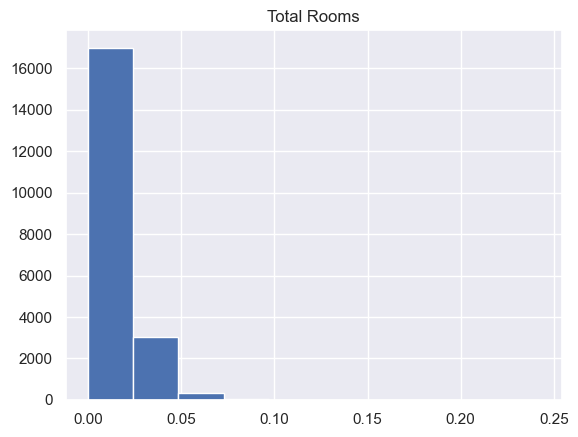

In [27]:
## The distribution is no longer normal or skewed normal. Try standardization.
scaled_df.hist(column='Total Rooms')

In [28]:
## Reference: https://www.geeksforgeeks.org/ml-feature-scaling-part-2/

from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
standard_df = capped_df.copy()
standard_df[['Latitude', 'Longitude', 'Housing Median Age', 'Total Rooms', 'Total Bedrooms', 'Population', 'Households', 'Median Income', 'Median House Value']] = scaler.fit_transform(standard_df[['Latitude', 'Longitude', 'Housing Median Age', 'Total Rooms', 'Total Bedrooms', 'Population', 'Households', 'Median Income', 'Median House Value']])
standard_df.head()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Proximity to Ocean_<1H OCEAN,Proximity to Ocean_INLAND,Proximity to Ocean_ISLAND,Proximity to Ocean_NEAR BAY,Proximity to Ocean_NEAR OCEAN
0,-1.327266,1.051669,0.982115,-1.118953,-1.301199,-1.327212,-1.293516,2.541616,2.177313,0,0,0,1,0
1,-1.322275,1.042307,-0.606272,2.325095,2.102426,1.394484,2.344961,2.541616,1.346490,0,0,0,1,0
2,-1.332257,1.037626,1.855728,-0.697994,-1.088691,-1.099422,-1.101024,2.084649,1.289983,0,0,0,1,0
3,-1.337249,1.037626,1.855728,-0.836401,-0.931922,-1.018256,-0.942501,1.110814,1.194628,0,0,0,1,0
4,-1.337249,1.037626,1.855728,-0.583252,-0.775153,-1.009092,-0.791527,0.026824,1.202575,0,0,0,1,0


array([[<Axes: title={'center': 'Total Rooms'}>]], dtype=object)

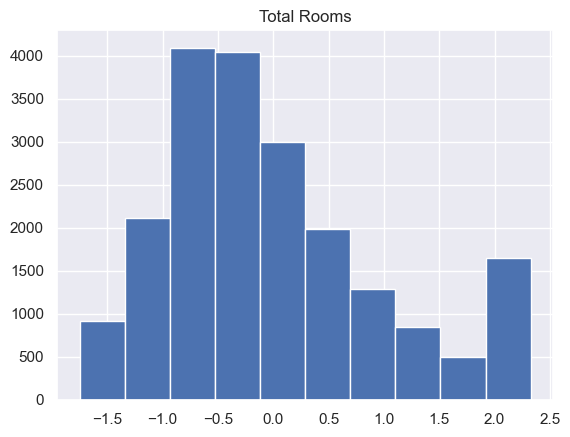

In [29]:
standard_df.hist(column='Total Rooms')

In [30]:
## When training the model, run both standardized and normalized sets through training for comparison. Hypothesis: Cap outlier 
## with standardization will perform better.